# Benchmark Dataset Analysis

In [1]:
from octis.dataset.dataset import Dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

import os

In [2]:
def fetch_dataset_from_octis(dataset_name: str):
    dataset = Dataset()
    dataset.fetch_dataset(dataset_name)

    df = pd.DataFrame()

    # Documents and classes
    df['document'] = [' '.join(item) for item in dataset.get_corpus()]

    df['class_name'] = dataset.get_labels()
    true_topics = list(set(dataset.get_labels()))
    class_index = [true_topics.index(label) for label in df['class_name']]
    df['class_index'] = class_index

    # Separate train and test
    train_df = df.sample(frac=0.8, random_state=42)
    train_df['dataset_type'] = 'train'

    test_df = df.drop(train_df.index)
    test_df['dataset_type'] = 'test'

    resulting_df = pd.concat([train_df, test_df]).reset_index(drop=True)

    # Save
    if (not os.path.exists(f'./datasets/{dataset_name}/')):
        os.makedirs(f'./datasets/{dataset_name}/')
    resulting_df.to_csv(f'./datasets/{dataset_name}/dataset.csv', index=False)

    return resulting_df

In [3]:
def display_infos_about_dataset(df: pd.DataFrame, n_bins_1: int = 100, n_bins_2: int = 100, x_lim_1: int = 1000, x_lim_2: int = 1000):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    fig.tight_layout(pad=5.0)

    train_df = df[df['dataset_type'] == 'train']
    test_df = df[df['dataset_type'] == 'test']

    # Distribution of classes
    ax[0, 0].set_title('Distribution of classes')

    class_df = pd.DataFrame()
    class_df['train'] = train_df['class_index'].value_counts(normalize=True).sort_index()
    class_df['test'] = test_df['class_index'].value_counts(normalize=True).sort_index()
    class_df = pd.melt(class_df.reset_index(), id_vars=['class_index'], value_vars=['train', 'test'])

    sns.barplot(x='class_index', y='value', hue='variable', data=class_df, ax=ax[0, 0])

    ax[0, 0].set_xlabel('Class index')
    ax[0, 0].set_ylabel('Percentage of documents')

    # Distribution of documents length
    ax[0, 1].set_title('Distribution of documents length')

    sns.histplot(train_df['document'].apply(lambda x: len(x.split())), bins=n_bins_1, ax=ax[0, 1], kde=True, stat='density', label='Train')
    sns.histplot(test_df['document'].apply(lambda x: len(x.split())), bins=n_bins_1, ax=ax[0, 1], kde=True, stat='density', label='Test')

    ax[0, 1].set_xlabel('Number of words')
    ax[0, 1].set_ylabel('Number of documents')
    ax[0, 1].legend()
    ax[0, 1].set_xlim(0, x_lim_1)

    # Most frequent words
    ax[1, 0].set_title('Most frequent words')
    
    train_df['document'].str.split(expand=True).stack().value_counts()[:20].plot(kind='bar', ax=ax[1, 0])

    ax[1, 0].set_xlabel('Word')
    ax[1, 0].set_ylabel('Number of occurences')

    # Distribution of words frequency/occurences
    ax[1, 1].set_title('Distribution of words frequency/occurences')

    sns.histplot(train_df['document'].str.split(expand=True).stack().value_counts(), bins=n_bins_2, ax=ax[1, 1], kde=True, stat='density', label='Train')
    sns.histplot(test_df['document'].str.split(expand=True).stack().value_counts(), bins=n_bins_2, ax=ax[1, 1], kde=True, stat='density', label='Test')
    
    ax[1, 1].set_xlabel('Number of occurences')
    ax[1, 1].set_ylabel('Number of words')
    ax[1, 1].legend()
    ax[1, 1].set_xlim(0, x_lim_2)

    plt.show()

## 20NewsGroup

In [4]:
tng_df = fetch_dataset_from_octis('20NewsGroup')
tng_df.head()

,document,class_name,class_index,dataset_type
0,compare sort ice play hockey surely quickly ta...,rec.sport.hockey,18,train
1,buy dealer profit dealer profit pay car save m...,rec.autos,2,train
2,speak paper year ago sit image image reference...,sci.space,7,train
3,quality pitcher expect note opportunity note r...,rec.sport.baseball,17,train
4,posting intend answer frequently question post...,rec.motorcycles,9,train


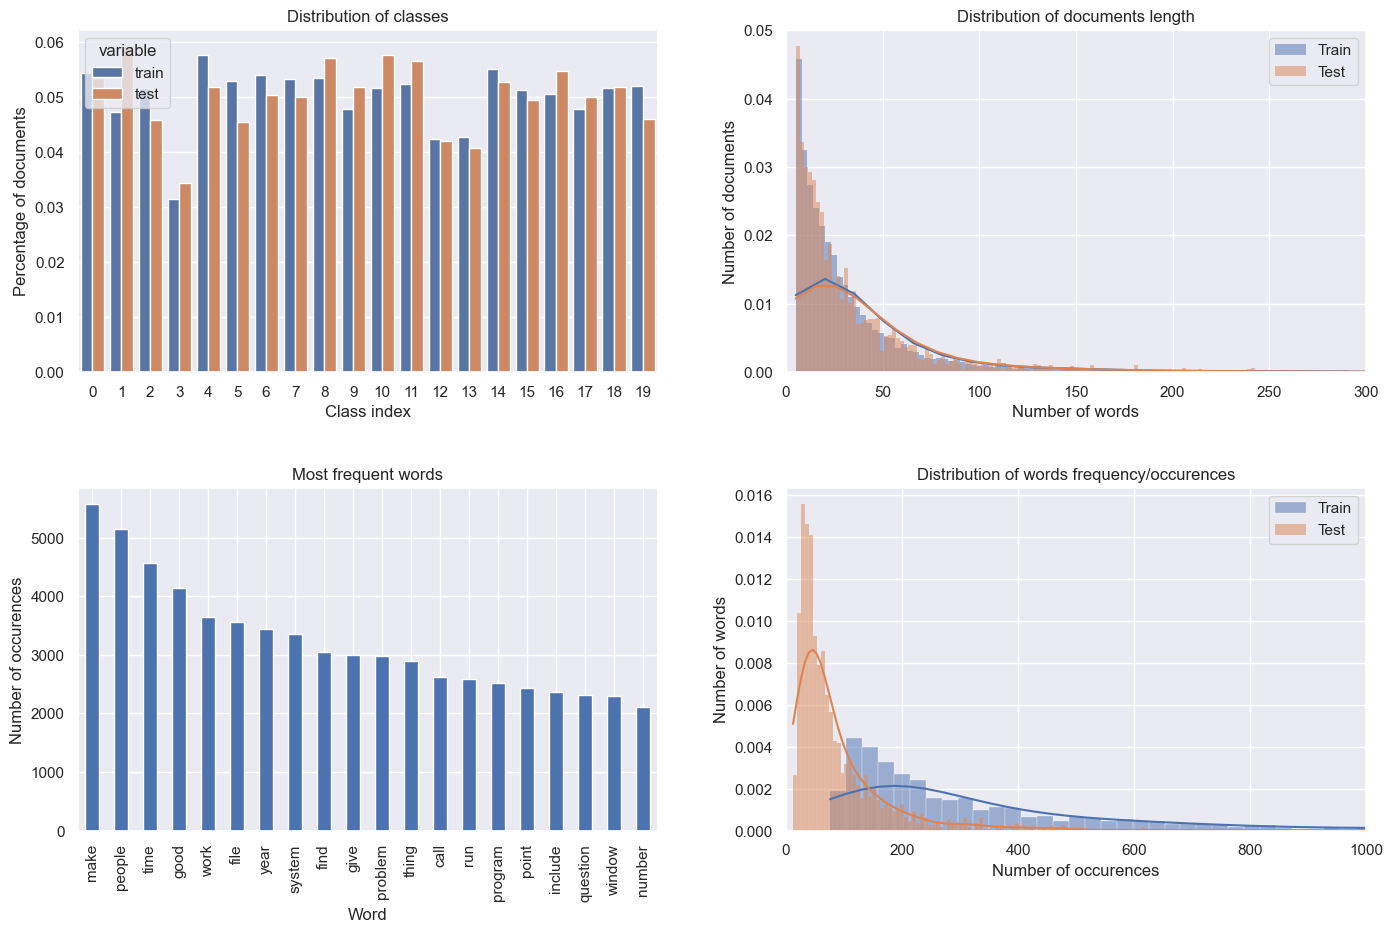

In [5]:
display_infos_about_dataset(tng_df, n_bins_1 = 1000, n_bins_2 = 200, x_lim_1 = 300, x_lim_2 = 1000)

# BBC News

In [6]:
bbcn_df = fetch_dataset_from_octis('BBC_News')
bbcn_df.head()

,document,class_name,class_index,dataset_type
0,hit shelf combine medium player phone gaming g...,tech,0,train
1,bid hope join host apply host tournament aim r...,sport,4,train
2,lord wrong detainee straw straw attack decisio...,politics,1,train
3,leak answer minister explain budget detail pri...,politics,1,train
4,delight manager pay tribute goal striker beat ...,sport,4,train


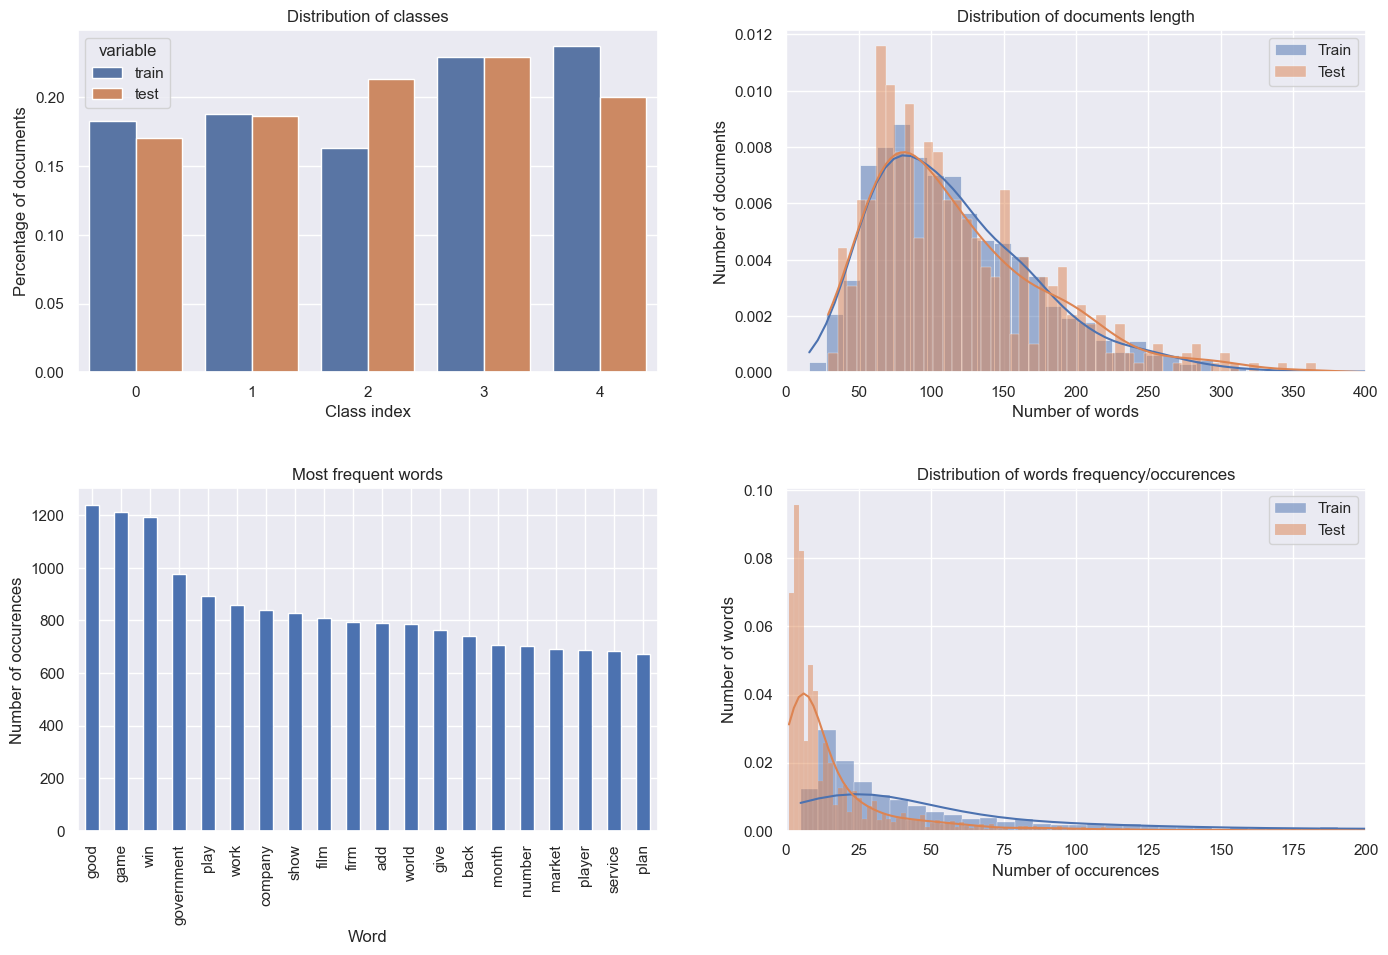

In [7]:
display_infos_about_dataset(bbcn_df, n_bins_1 = 100, n_bins_2 = 200, x_lim_1 = 400, x_lim_2 = 200)

## DBLP

In [8]:
dblp_df = fetch_dataset_from_octis('DBLP')
dblp_df.head()

,document,class_name,class_index,dataset_type
0,segmentation level set method landmark edge di...,2,0,train
1,type planning language generation,1,1,train
2,dbms preliminary report,0,3,train
3,compare set positive negative argument empiric...,1,1,train
4,team tree pruning,1,1,train


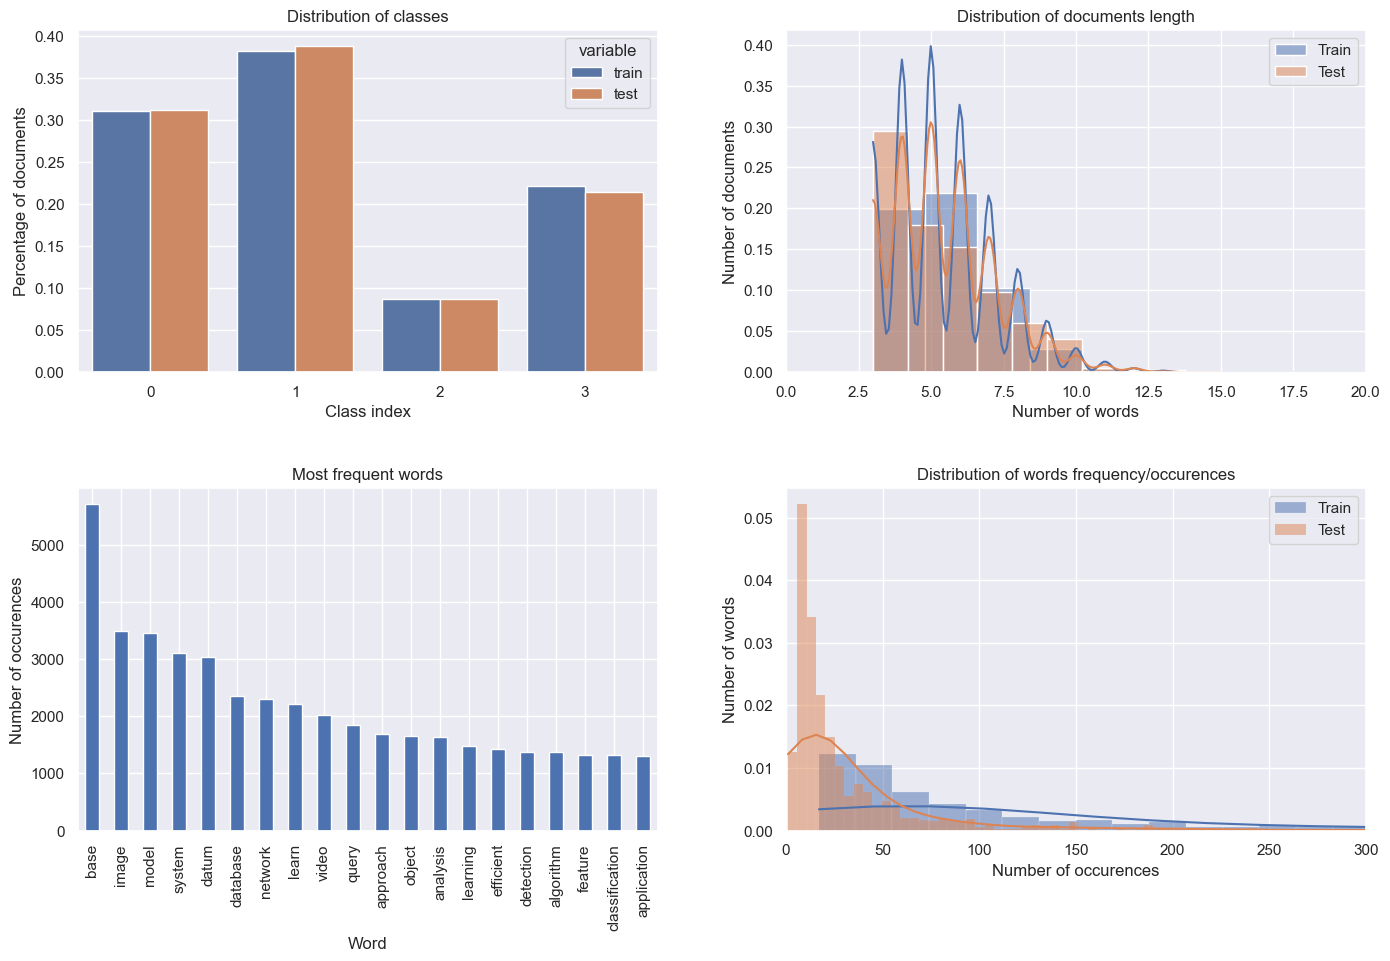

In [9]:
display_infos_about_dataset(dblp_df, n_bins_1 = 10, n_bins_2 = 300, x_lim_1 = 20, x_lim_2 = 300)

# M10

In [10]:
m10_df = fetch_dataset_from_octis('M10')
m10_df.head()

,document,class_name,class_index,dataset_type
0,locality particle concept topic foundation fie...,8,3,train
1,finite element method elliptic problem coeffic...,6,0,train
2,microarray image stage technique,2,8,train
3,impact fund global financial market,4,7,train
4,hierarchical run time model measurement contro...,5,5,train


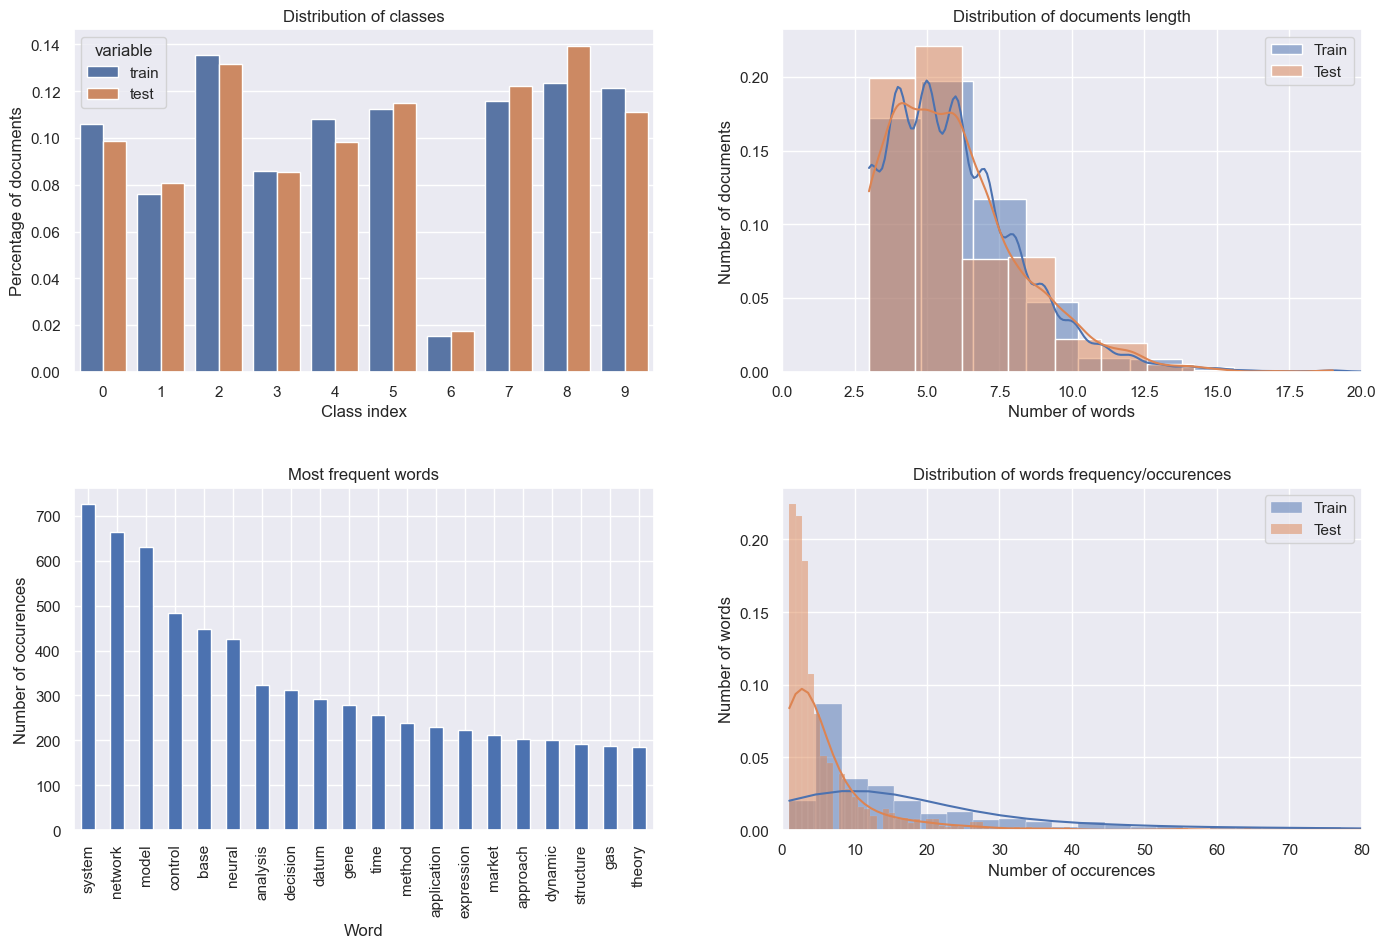

In [11]:
display_infos_about_dataset(m10_df, n_bins_1 = 10, n_bins_2 = 200, x_lim_1 = 20, x_lim_2 = 80)